/home/super-workstation/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
W0905 17:00:10.736313 139747898791744 image.py:700] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(5, 500, 500, 3) (5, 500, 500, 21)
info:
image size -->  500 x 500
channels -->  3


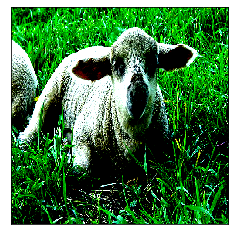

info:
image size -->  500 x 500


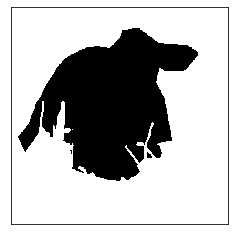

'\n# v2 get image and label\nconfig = Config()\nconfig.batch_size = 5\nconfig.steps_per_epoch = 180\nconfig.validation_steps = 40\nconfig.shuffle=False\ntrain_dataset = PascalDataset(path, is_train=True)\nval_dataset = PascalDataset(path, is_train=False)\n\ntrain_gen = data_generator(train_dataset, config)\nval_gen = data_generator(val_dataset, config)\n\nimg_label = next(val_gen)\nimg_label = next(val_gen)\n#print(img_label[1].shape)\nutils.showSingleImage(img_label[0][0])\nutils.showSingleImage(img_label[1][0,:,:,17])\n'

In [3]:
# read dataset pascal
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio
import sys
#print(sys.path)
sys.path.insert(0, '../')
from dpl import utils
from dpl.data.pascal import preprocessing

import keras
import multiprocessing
# 标签数据预处理
#preprocessing.split_label_into_masks("/home/super-workstation/Data/pascal/VOC_Data/VOC2012/SegmentationClass", "/mask1/")

import os
import cv2
    
from dpl.data.pascal.voc_data_generator import *
from dpl.data.pascal.voc_data_generator_v2 import *

image_root = "/home/super-workstation/Data/pascal/VOC_Data/VOC2012/"
path = image_root
# v1 get image and label
import yaml
with open("init_args.yml", 'r') as stream:
    try:
        init_args = yaml.load(stream)
    except yaml.YAMLError as exc:
        print(exc)

datagen = PascalVocGenerator(image_shape=[224, 224, 3],
                             image_resample=True,
                             pixelwise_center=True,
                             pixel_mean=[115.85100, 110.50989, 102.16182],
                             pixelwise_std_normalization=True,
                             pixel_std=[70.30930, 69.41244, 72.60676])

train_loader = ImageSetLoader(**init_args['image_set_loader']['train'])
val_loader = ImageSetLoader(**init_args['image_set_loader']['val'])
val_gen = datagen.flow_from_imageset(
        class_mode='categorical',
        classes=21,
        batch_size=5,
        shuffle=False,
        image_set_loader=val_loader)
batch = next(val_gen)
batch = next(val_gen)
print(batch[0].shape, batch[1].shape)
utils.showSingleImage(batch[0][0])
utils.showSingleImage(batch[1][0,:,:,17])

'''
# v2 get image and label
config = Config()
config.batch_size = 5
config.steps_per_epoch = 180
config.validation_steps = 40
config.shuffle=False
train_dataset = PascalDataset(path, is_train=True)
val_dataset = PascalDataset(path, is_train=False)

train_gen = data_generator(train_dataset, config)
val_gen = data_generator(val_dataset, config)

img_label = next(val_gen)
img_label = next(val_gen)
#print(img_label[1].shape)
utils.showSingleImage(img_label[0][0])
utils.showSingleImage(img_label[1][0,:,:,17])
'''


#print(img_label[0][0][100:200,:])

In [1]:
import sys
sys.path.insert(0, '../')
sys.path.insert(0, './segment')
import segment.fcn32s_net as fcn
import segment.fcn32s_net_v2 as fcnv2
from keras.optimizers import SGD

# model = fcn.create_fcn32s((500,500,3))
# sgd = SGD(lr=1e-4, momentum=0.9)
# metrics=["accuracy", utils.mean_iou]
#model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=metrics)
#print(model.summary())
#model.load_weights("./check_points/_weights.hdf5")
#predicts = model.predict_on_batch(batch[0])
#scores = model.test_on_batch(batch[0], batch[1])
#print(scores)

model = fcnv2.create_fcn32s_v2((500,500,3))
model.load_weights("./check_points/fcn32s_net+_weights.hdf5")
w = model.get_weights()
print(w[0])

Using TensorFlow backend.
/home/super-workstation/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/super-workstation/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/super-workstation/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/super-workstation/.local/l

[[[[ 0.01947947 -0.0820624  -0.01549878 ... -0.04213914  0.07849648
     0.01478199]
   [-0.0961991  -0.00387951  0.06836288 ... -0.00444697  0.04280272
    -0.01867599]
   [-0.03178661  0.01235907 -0.0175416  ... -0.01115936 -0.09456199
     0.04982853]]

  [[ 0.01350302 -0.00427792  0.00715806 ...  0.09740193  0.06371509
    -0.0531331 ]
   [ 0.05612853  0.07984759  0.03952132 ...  0.07510945 -0.05988737
     0.04489591]
   [-0.01333608  0.00144993 -0.00367748 ...  0.0864831   0.00086664
     0.0453099 ]]

  [[-0.08704042 -0.07444093 -0.04260104 ... -0.02898508 -0.07104742
     0.0209199 ]
   [ 0.01686612  0.04793458 -0.08223214 ... -0.09291375 -0.05301059
    -0.05622457]
   [ 0.0216095   0.09782807 -0.07357416 ...  0.09418879 -0.03086155
    -0.06998029]]]


 [[[ 0.08745624  0.05541747  0.06577504 ...  0.00627458  0.06765047
     0.07926776]
   [-0.04995299  0.02916438 -0.03201939 ...  0.07409742  0.07690777
    -0.07571748]
   [-0.06191342  0.07096698 -0.08883639 ...  0.04546008 -

In [5]:
from PIL import Image
def predict_image(model, image):
    input_p = np.zeros((1, image.shape[0], image.shape[1], image.shape[2]))
    input_p[0] = image
    predict = model.predict(input_p)
    seg = np.argmax(predict[0], axis=-1).astype(np.uint8)
    result = Image.fromarray(seg, mode='P')
    return result
    
re = predict_image(model, batch[0][0])
re.save("inference.png")
re.show()

(5, 500, 500)
info:
image size -->  500 x 500


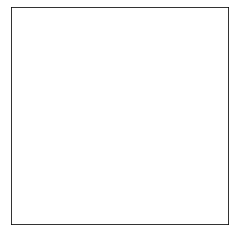

info:
image size -->  500 x 500


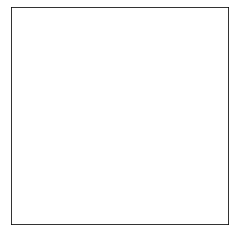

info:
image size -->  500 x 500


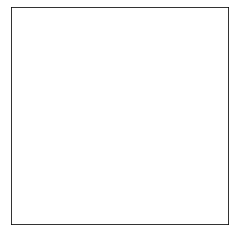

info:
image size -->  500 x 500


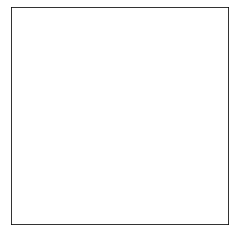

info:
image size -->  500 x 500


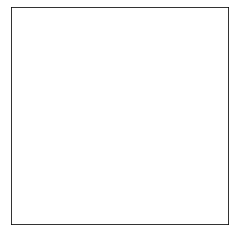

In [14]:
# predicts = model.predict_on_batch(batch[0])
# print(predicts[0])
predicts = model.predict_on_batch(batch[0])
#print(predicts)
imgs = np.argmax(predicts, axis=-1).astype(np.bool)
# print(imgs[0])
print(imgs.shape)
utils.showSingleImage(imgs[0])
utils.showSingleImage(imgs[1])
utils.showSingleImage(imgs[2])
utils.showSingleImage(imgs[3])
utils.showSingleImage(imgs[4])
# utils.showSingleImage(batch[0][1])

In [9]:
import numpy as np
import keras
import keras.backend as K
from keras.models import load_model
from dpl.data.pascal.voc_data_generator import PascalVocGenerator, ImageSetLoader
from dpl.utils import BilinearUpSampling2D

import yaml
with open("init_args.yml", 'r') as stream:
    try:
        init_args = yaml.load(stream)
    except yaml.YAMLError as exc:
        print(exc)

datagen = PascalVocGenerator(image_shape=[500, 500, 3],
                             image_resample=True,
                             pixelwise_center=True,
                             pixel_mean=[115.85100, 110.50989, 102.16182],
                             pixelwise_std_normalization=True,
                             pixel_std=[70.30930, 69.41244, 72.60676])
dataload = ImageSetLoader(**init_args['image_set_loader']['train'])

model = load_model('./check_points/fcn32s_v2+_weights.hdf5',
        custom_objects={'BilinearUpSampling2D': BilinearUpSampling2D})
print(model.summary())


# for fn in dataload.filenames[:10]:
#     x = dataload.load_img(fn)
#     x = datagen.standardize(x)
#     print(x.min(), x.max())
#     X = x[np.newaxis, ...]
#     label = dataload.load_seg(fn)
#     label = np.squeeze(label, axis=-1).astype('int')
#     y_enc = np.eye(21)[label]
#     y_true = y_enc[np.newaxis, ...]
#     result = model.evaluate(X, y_true)

#     y_pred = model.predict(X)
#     print(np.unique(y_true), np.unique(y_pred))
#     loss = keras.losses.categorical_crossentropy(K.variable(y_true), K.variable(y_pred))
#     print(y_true.shape, y_pred.shape)
#     print(result, K.eval(loss))

#     pred = np.argmax(y_pred, axis=-1)
#     pred = pred[..., np.newaxis]
#     pred = np.squeeze(pred, axis=0)
#     print(np.unique(label), np.unique(pred))
#     print(np.size(label), np.sum(label != 0))


/home/super-workstation/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  # This is added back by InteractiveShellApp.init_path()


ValueError: Cannot create group in read only mode.